In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import time
import joblib

In [ ]:
data = pd.read_csv("dataset.csv")
data.drop(columns=['education'], inplace=True)
data.replace('?', 'Not-Listed', inplace=True)
data

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Not-Listed,103497,10,Never-married,Not-Listed,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


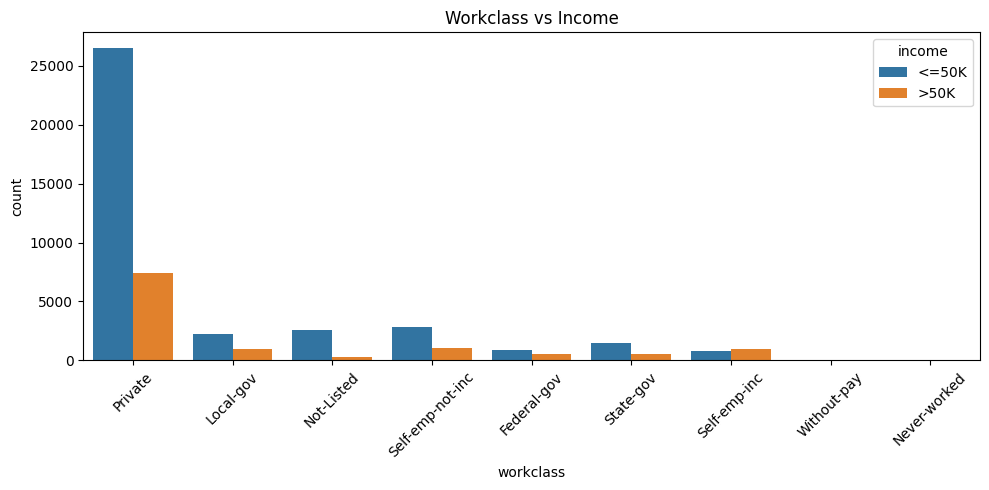

In [73]:
plt.figure(figsize=(10,5))
sns.countplot(data=data, x='workclass', hue='income')
plt.xticks(rotation=45)
plt.title("Workclass vs Income")
plt.tight_layout()
plt.show()

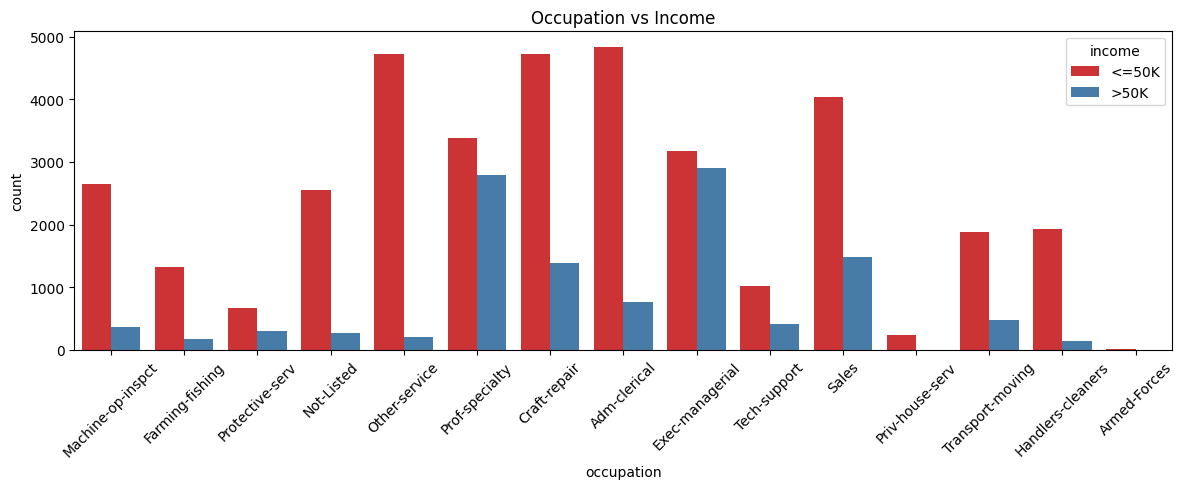

In [74]:
plt.figure(figsize=(12,5))
sns.countplot(data=data, x='occupation', hue='income', palette='Set1')
plt.xticks(rotation=45)
plt.title("Occupation vs Income")
plt.tight_layout()
plt.show()

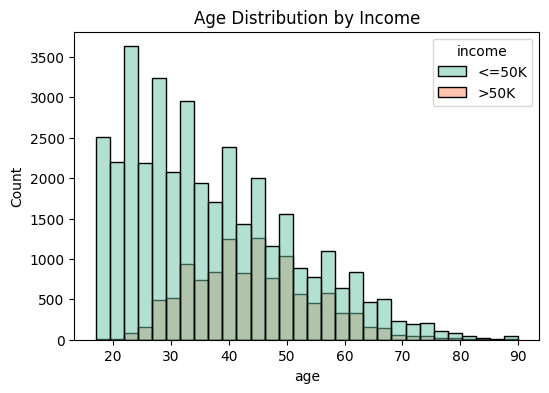

In [75]:
plt.figure(figsize=(6,4))
sns.histplot(data=data, x='age', hue='income', palette='Set2', bins=30)
plt.title("Age Distribution by Income")
plt.show()

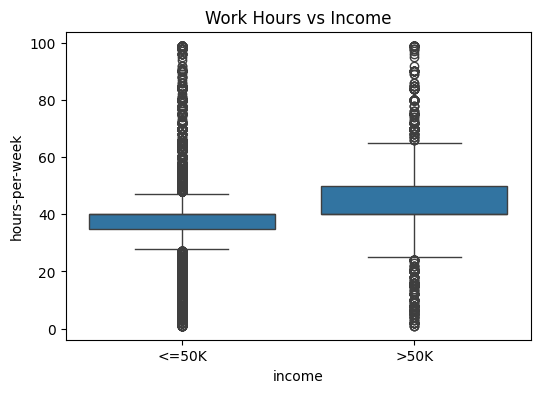

In [76]:
plt.figure(figsize=(6,4))
sns.boxplot(data=data, x='income', y='hours-per-week')
plt.title("Work Hours vs Income")
plt.show()

In [77]:
categorical_cols = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']
encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    encoders[col] = le

joblib.dump(encoders, "encoders.pkl")

['encoders.pkl']

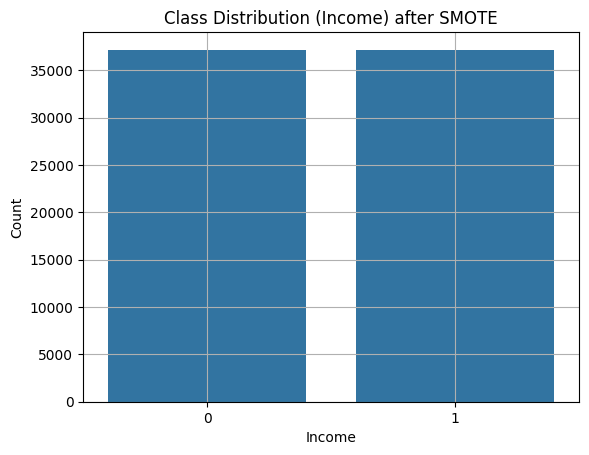

Original data class distribution:
income
0    37155
1    11687
Name: count, dtype: int64

After SMOTE class distribution:
income
0    37155
1    37155
Name: count, dtype: int64


In [ ]:
X = data.drop(columns=['income'])
y = data['income']

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

sns.countplot(x=y_res)
plt.title("Class Distribution (Income) after SMOTE")
plt.xlabel("Income")
plt.ylabel("Count")
plt.grid(True)
plt.show()

# 0 = <=50K, 1 = >50K
print("Original data class distribution:")
print(data['income'].value_counts())

print("\nAfter SMOTE class distribution:")
print(pd.Series(y_res).value_counts())


Training LogisticRegression...
LogisticRegression Accuracy: 0.7732
              precision    recall  f1-score   support

           0       0.78      0.76      0.77      7434
           1       0.77      0.78      0.78      7428

    accuracy                           0.77     14862
   macro avg       0.77      0.77      0.77     14862
weighted avg       0.77      0.77      0.77     14862



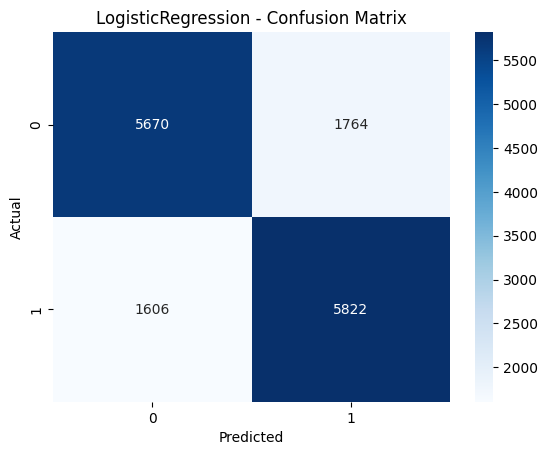

LogisticRegression took 0.49 seconds.

Training RandomForest...
RandomForest Accuracy: 0.8891
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      7434
           1       0.89      0.89      0.89      7428

    accuracy                           0.89     14862
   macro avg       0.89      0.89      0.89     14862
weighted avg       0.89      0.89      0.89     14862



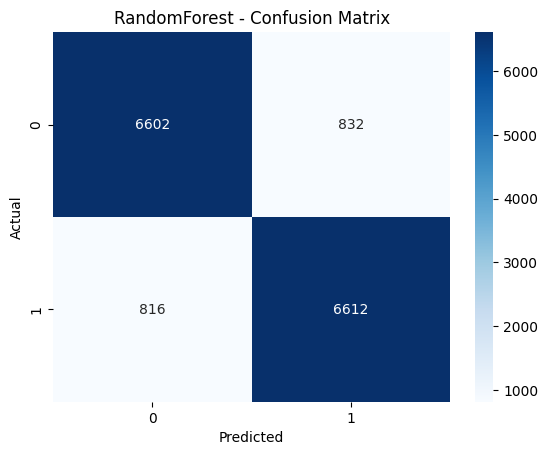

RandomForest took 3.54 seconds.

Training GradientBoosting...
GradientBoosting Accuracy: 0.8685
              precision    recall  f1-score   support

           0       0.88      0.85      0.87      7434
           1       0.86      0.89      0.87      7428

    accuracy                           0.87     14862
   macro avg       0.87      0.87      0.87     14862
weighted avg       0.87      0.87      0.87     14862



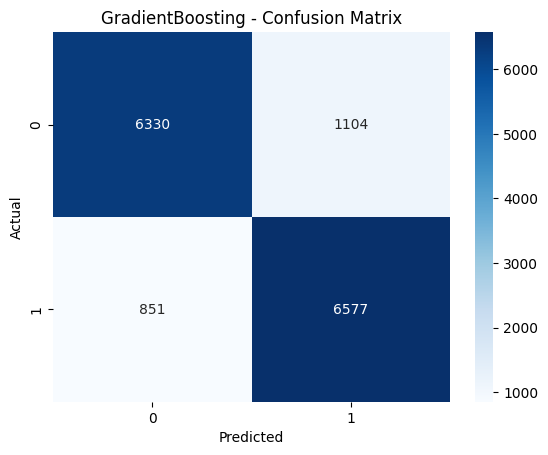

GradientBoosting took 12.18 seconds.

Training SVM...
SVM Accuracy: 0.8585
              precision    recall  f1-score   support

           0       0.89      0.82      0.85      7434
           1       0.84      0.89      0.86      7428

    accuracy                           0.86     14862
   macro avg       0.86      0.86      0.86     14862
weighted avg       0.86      0.86      0.86     14862



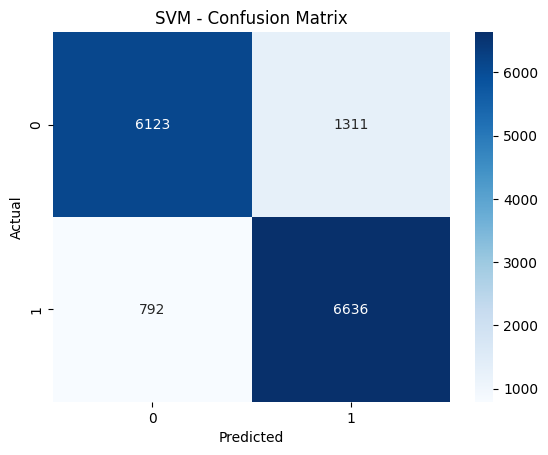

SVM took 235.86 seconds.

Training KNN...
KNN Accuracy: 0.8499
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      7434
           1       0.84      0.86      0.85      7428

    accuracy                           0.85     14862
   macro avg       0.85      0.85      0.85     14862
weighted avg       0.85      0.85      0.85     14862



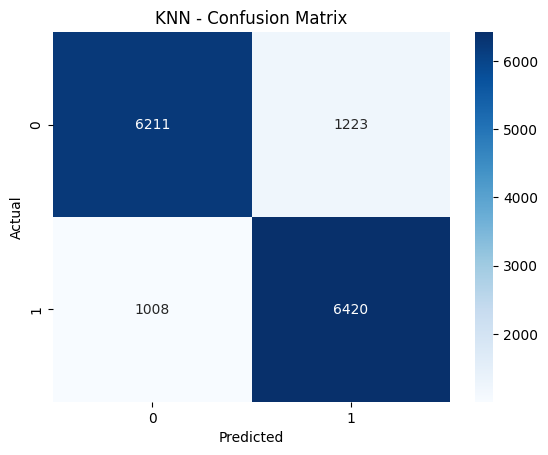

KNN took 25.89 seconds.

Training DecisionTree...
DecisionTree Accuracy: 0.8479
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      7434
           1       0.85      0.85      0.85      7428

    accuracy                           0.85     14862
   macro avg       0.85      0.85      0.85     14862
weighted avg       0.85      0.85      0.85     14862



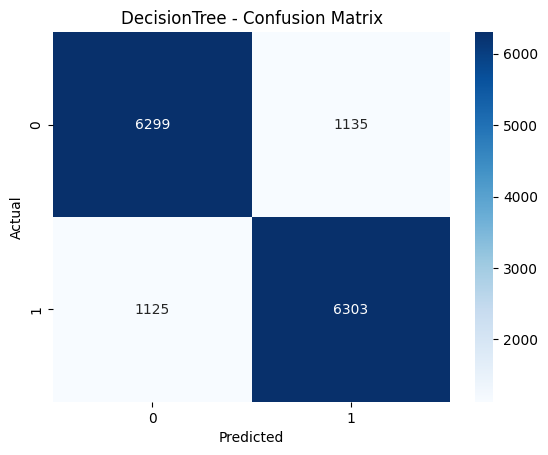

DecisionTree took 1.31 seconds.

Training NaiveBayes...
NaiveBayes Accuracy: 0.6923
              precision    recall  f1-score   support

           0       0.63      0.93      0.75      7434
           1       0.86      0.46      0.60      7428

    accuracy                           0.69     14862
   macro avg       0.75      0.69      0.67     14862
weighted avg       0.75      0.69      0.67     14862



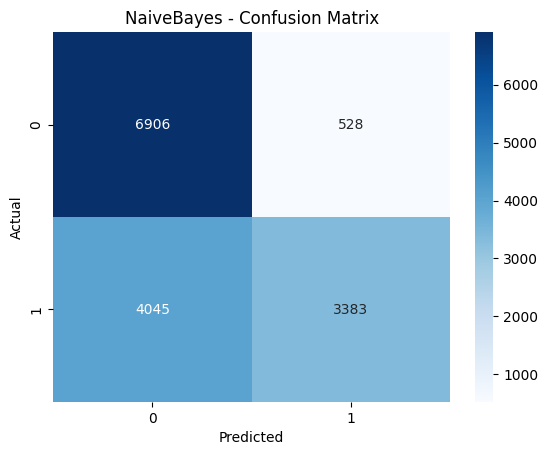

NaiveBayes took 0.45 seconds.

Training XGBoost...


C:\Users\Administrator\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [19:55:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.8919
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      7434
           1       0.89      0.89      0.89      7428

    accuracy                           0.89     14862
   macro avg       0.89      0.89      0.89     14862
weighted avg       0.89      0.89      0.89     14862



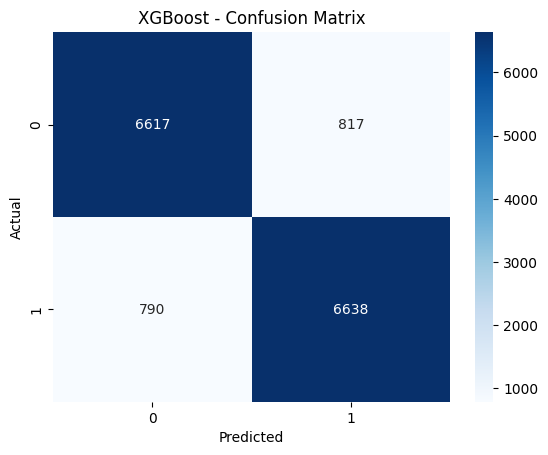

XGBoost took 1.18 seconds.


In [79]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.20, random_state=42)

models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RandomForest": RandomForestClassifier(n_jobs=-1),
    "GradientBoosting": GradientBoostingClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "DecisionTree": DecisionTreeClassifier(),
    "NaiveBayes": GaussianNB(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    start = time.time()

    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)

    acc = accuracy_score(y_test, preds)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, preds))

    cm = confusion_matrix(y_test, preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    print(f"{name} took {time.time() - start:.2f} seconds.")

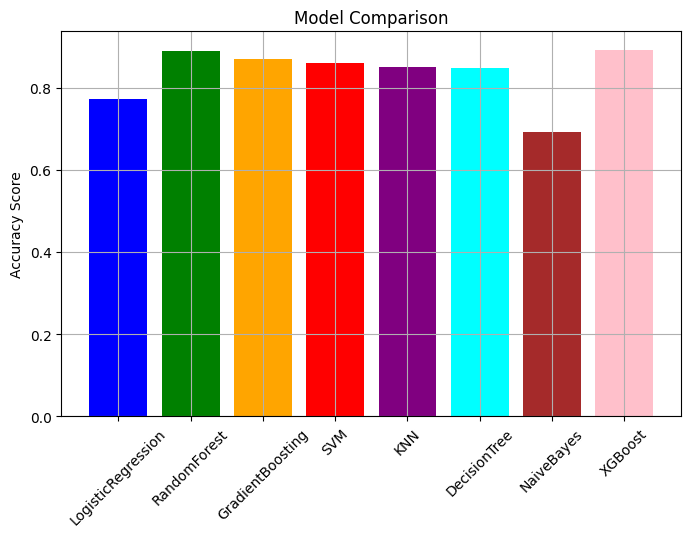

In [86]:
plt.figure(figsize=(8, 5))
plt.bar(results.keys(), results.values(), color=['blue', 'green', 'orange', 'red', 'purple', 'cyan', 'brown', 'pink'])
plt.ylabel('Accuracy Score')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [81]:
best_model_name = max(results, key=results.get)
final_model = models[best_model_name].fit(X_train, y_train)
joblib.dump(final_model, "best_model.pkl")
print(f"\nBest model: {best_model_name} with accuracy {results[best_model_name]:.4f}")
print("Saved best model as best_model.pkl")

C:\Users\Administrator\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [19:55:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Best model: XGBoost with accuracy 0.8919
Saved best model as best_model.pkl


Compares actual income from dataset.csv with Predicted Income from model output from Streamlit
Shows mismatches, accuracy, and classification report

In [8]:
original_df = pd.read_csv('dataset.csv')
predicted_df = pd.read_csv('2025-07-21T14-48_export.csv')

original_df = original_df.reset_index(drop=True)
predicted_df = predicted_df.reset_index(drop=True)

comparison_df = original_df[['income']].copy()
comparison_df['Predicted Income'] = predicted_df['Predicted Income']

mismatches = (comparison_df[comparison_df['income'] != comparison_df['Predicted Income']]).value_counts()
print("Mismatches between actual and predicted:")
print(mismatches)

print("\nClassification Report:")
print(classification_report(comparison_df['income'], comparison_df['Predicted Income']))

acc = accuracy_score(comparison_df['income'], comparison_df['Predicted Income'])
print(f"\nAccuracy: {acc:.4f}")

Mismatches between actual and predicted:
income  Predicted Income
<=50K   >50K                3611
>50K    <=50K               2583
Name: count, dtype: int64

Classification Report:
              precision    recall  f1-score   support

       <=50K       0.93      0.90      0.92     37155
        >50K       0.72      0.78      0.75     11687

    accuracy                           0.87     48842
   macro avg       0.82      0.84      0.83     48842
weighted avg       0.88      0.87      0.87     48842


Accuracy: 0.8732
